In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [79]:
flagdata = pd.read_csv("project data/FLAG_Statewide_2006.csv")
flagdata.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2007009728,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2006021945,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,2006036442,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2006206725,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
4,2006049128,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [80]:
flagdata.shape

(129248, 120)

In [81]:
#Making copy of original 2006 flag dataset to begin cleaning process
cleaned_2006_data = flagdata.copy()
cleaned_2006_data.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2007009728,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2006021945,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,2006036442,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2006206725,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
4,2006049128,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [82]:
#Looked through dataset for valuable columns to keep.
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED','DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION',
                  'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping specifed wanted columns
cleaned_2006_data = cleaned_2006_data.drop(columns=cleaned_2006_data.columns.difference(columns_to_keep))
cleaned_2006_data.head()

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2007009728,0,0,0,0,0,0,1,0,1,0
1,2006021945,0,1,0,0,0,1,0,0,1,1
2,2006036442,1,0,0,0,0,0,1,0,0,0
3,2006206725,0,0,0,0,0,1,0,0,0,1
4,2006049128,1,0,0,0,1,1,0,0,0,0


In [83]:
cleaned_2006_data.shape

(129248, 11)

In [84]:
# Define the columns to check for 0 values
columns_to_check = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Find rows containing a 0 in every column using boolean mask
mask = cleaned_2006_data[columns_to_check].eq(0).all(axis=1)

#Using the filter
cleaned_2006_data = cleaned_2006_data[~mask]
#Dataset changed in number of rows bc those with 0's in every column were removed
cleaned_2006_data.shape

(129248, 11)

In [85]:
cleaned_2006_data.head()

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2007009728,0,0,0,0,0,0,1,0,1,0
1,2006021945,0,1,0,0,0,1,0,0,1,1
2,2006036442,1,0,0,0,0,0,1,0,0,0
3,2006206725,0,0,0,0,0,1,0,0,0,1
4,2006049128,1,0,0,0,1,1,0,0,0,0


In [86]:
import pandas as pd

#Loading 2007 Flag 
flagdata_2007 = pd.read_csv("project data/FLAG_Statewide_2007.csv")
flagdata_2007.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2007033296,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2007069738,1,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,2007101611,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2007120240,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2007049070,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
flagdata_2007.shape

(132150, 120)

In [88]:
#Making a copy of the original 2007 flag dataset to begin the cleaning process
cleaned_2007_data = flagdata_2007.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2007_data = cleaned_2007_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2007_data.eq(0).all(axis=1)

#Using the filter
cleaned_2007_data = cleaned_2007_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2007 data:", cleaned_2007_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2007_data.head()


Shape of cleaned 2007 data: (132150, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2007033296,0,0,0,0,0,0,1,0,1,1
1,2007069738,0,0,0,0,0,1,0,0,0,0
2,2007101611,0,0,0,0,0,0,0,0,0,0
3,2007120240,0,0,0,0,0,0,0,0,1,0
4,2007049070,0,0,0,0,0,1,0,0,1,0


In [89]:
import pandas as pd

#Loading 2009 Flag 
flagdata_2009 = pd.read_csv("project data/FLAG_Statewide_2009.csv")
flagdata_2009.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2009088483,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2009030647,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2009004283,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2009069210,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2009040369,1,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0


In [90]:
flagdata_2009.shape

(121794, 120)

In [91]:
#Making a copy of the original 2009 flag dataset to begin the cleaning process
cleaned_2009_data = flagdata_2009.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2009_data = cleaned_2009_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2009_data.eq(0).all(axis=1)

#Using the filter
cleaned_2009_data = cleaned_2009_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2009 data:", cleaned_2009_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2009_data.head()


Shape of cleaned 2009 data: (121794, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2009088483,0,0,0,0,0,0,0,0,0,0
1,2009030647,0,0,0,0,0,0,0,0,0,0
2,2009004283,0,0,0,0,0,0,0,0,0,0
3,2009069210,0,1,0,0,0,0,0,0,0,0
4,2009040369,0,1,0,0,0,1,0,0,0,1


In [92]:
import pandas as pd

#Loading 2010 Flag 
flagdata_2010 = pd.read_csv("project data/FLAG_Statewide_2010.csv")
flagdata_2010.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2010108608,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,2010047604,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2010127953,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2010092828,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,2010030630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
flagdata_2010.shape

(121612, 120)

In [94]:
#Making a copy of the original 2010 flag dataset to begin the cleaning process
cleaned_2010_data = flagdata_2010.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2010_data = cleaned_2010_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2010_data.eq(0).all(axis=1)

#Using the filter
cleaned_2010_data = cleaned_2010_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2010 data:", cleaned_2009_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2010_data.head()

Shape of cleaned 2010 data: (121794, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2010108608,0,0,0,0,0,0,0,0,0,0
1,2010047604,0,1,0,0,1,0,0,0,0,0
2,2010127953,0,1,0,0,1,0,0,0,0,0
3,2010092828,1,0,0,0,0,0,0,0,1,1
4,2010030630,0,0,0,0,0,0,0,0,0,0


In [95]:
# Check the sum of accidents for each feature for all years
data_2006 = cleaned_2006_data
accidents_2006 = data_2006[columns_to_keep].sum()
print("\nSum of accidents for 2006:")
print(accidents_2006)
data_2007 = cleaned_2007_data
accidents_2007 = data_2007[columns_to_keep].sum()
print("\nSum of accidents for 2007:")
print(accidents_2007)
data_2009 = cleaned_2009_data
accidents_2009 = data_2009[columns_to_keep].sum()
print("\nSum of accidents for 2009:")
print(accidents_2009)
data_2010 = cleaned_2010_data
accidents_2010 = data_2010[columns_to_keep].sum()
print("\nSum of accidents for 2010:")
print(accidents_2010)


Sum of accidents for 2006:
CRN                 259294795115845
CURVED_ROAD                   24566
DISTRACTED                    12708
DRUG_RELATED                   2542
DRUGGED_DRIVER                 2490
IMPAIRED_DRIVER               14895
INTERSECTION                  52004
INTERSTATE                     7858
SPEEDING                       6153
SPEEDING_RELATED              33622
WET_ROAD                      25579
dtype: int64

Sum of accidents for 2007:
CRN                 265253338327809
CURVED_ROAD                   26590
DISTRACTED                    12583
DRUG_RELATED                   2664
DRUGGED_DRIVER                 2582
IMPAIRED_DRIVER               14403
INTERSECTION                  50075
INTERSTATE                     8695
SPEEDING                       5686
SPEEDING_RELATED              37925
WET_ROAD                      23984
dtype: int64

Sum of accidents for 2009:
CRN                 244698342148656
CURVED_ROAD                   25433
DISTRACTED                

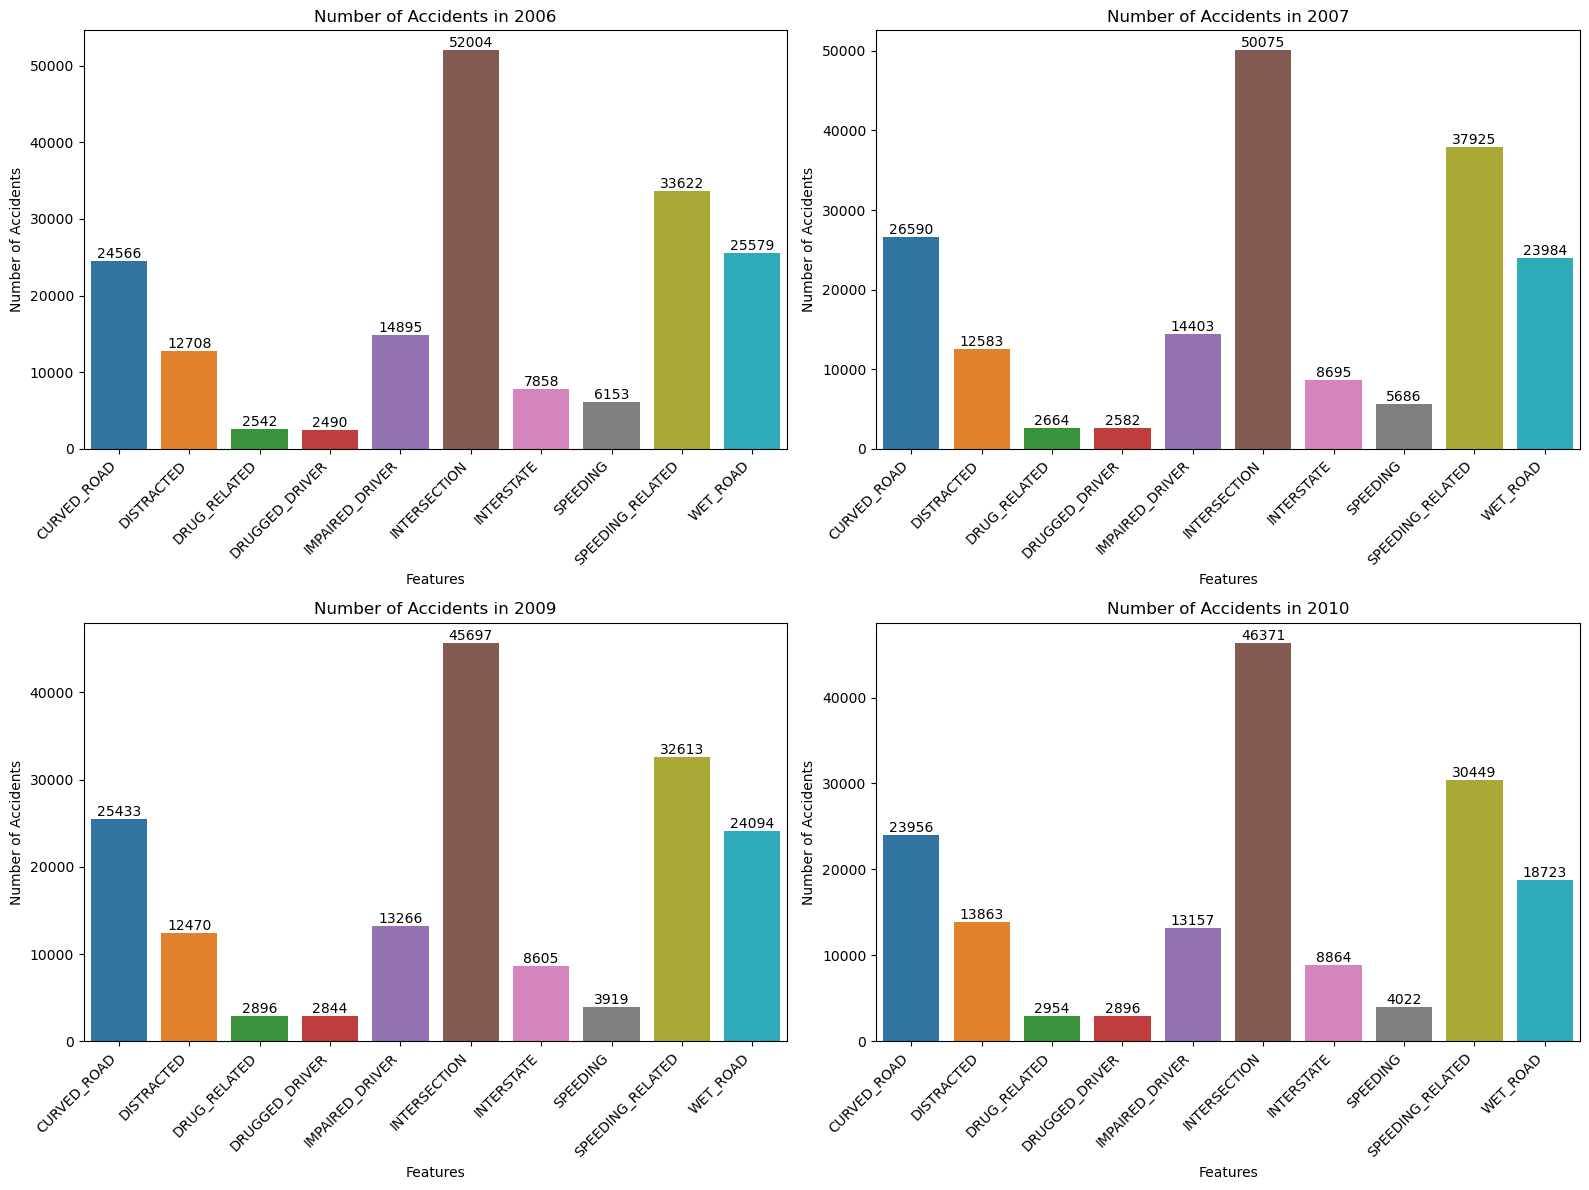

In [100]:
# Plotting the comparison with number of accidents per feature for all four years
plt.figure(figsize=(16, 12))

# Plot for 2006
plt.subplot(2, 2, 1)
sns.barplot(x=accidents_2006.index.drop('CRN'), y=accidents_2006.drop('CRN').values)
plt.title('Number of Accidents in 2006')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2006
for i, value in enumerate(accidents_2006.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2007
plt.subplot(2, 2, 2)47
sns.barplot(x=accidents_2007.index.drop('CRN'), y=accidents_2007.drop('CRN').values)
plt.title('Number of Accidents in 2007')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2007
for i, value in enumerate(accidents_2007.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2009
plt.subplot(2, 2, 3)
sns.barplot(x=accidents_2009.index.drop('CRN'), y=accidents_2009.drop('CRN').values)
plt.title('Number of Accidents in 2009')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2009
for i, value in enumerate(accidents_2009.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2010
plt.subplot(2, 2, 4)
sns.barplot(x=accidents_2010.index.drop('CRN'), y=accidents_2010.drop('CRN').values)
plt.title('Number of Accidents in 2010')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2010
for i, value in enumerate(accidents_2010.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()
